In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [85]:
df = pd.read_csv("Irisdataset.csv", header=None) 
df.head()


,0,1,2,3,4,5
0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       151 non-null    object
 1   1       151 non-null    object
 2   2       151 non-null    object
 3   3       151 non-null    object
 4   4       151 non-null    object
 5   5       151 non-null    object
dtypes: object(6)
memory usage: 7.2+ KB


In [87]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [88]:
df.columns = ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
#loading the CSV file with column headers

In [89]:
df = df.drop('Id', axis=1) # droping the id column

In [90]:
df.columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']

In [91]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


In [92]:
numeric_columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
#to make numeric

/Users/divyanshdiwakar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/divyanshdiwakar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/divyanshdiwakar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/divyanshdiwakar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

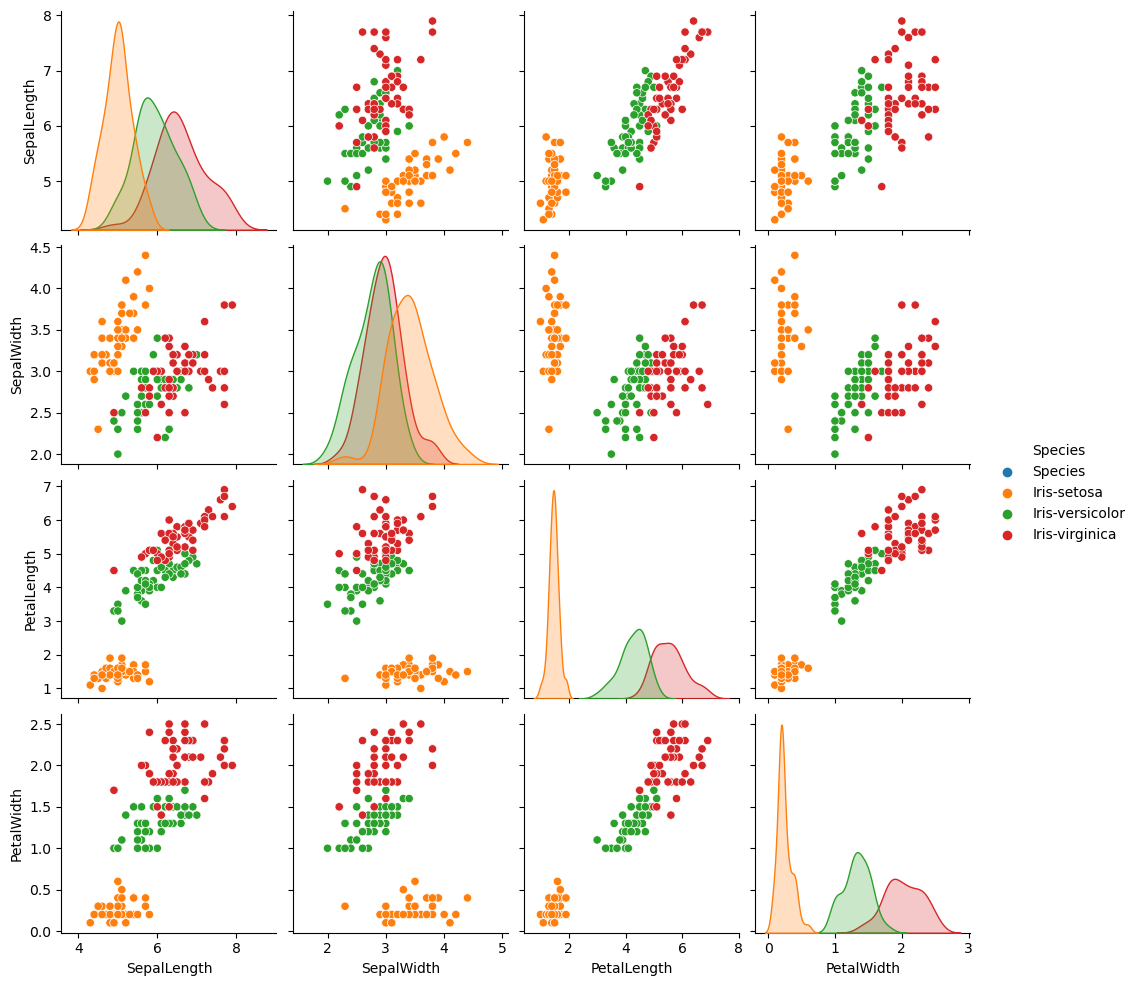

In [93]:
sns.pairplot(data=df, hue='Species')

<Axes: xlabel='Species', ylabel='PetalWidth'>

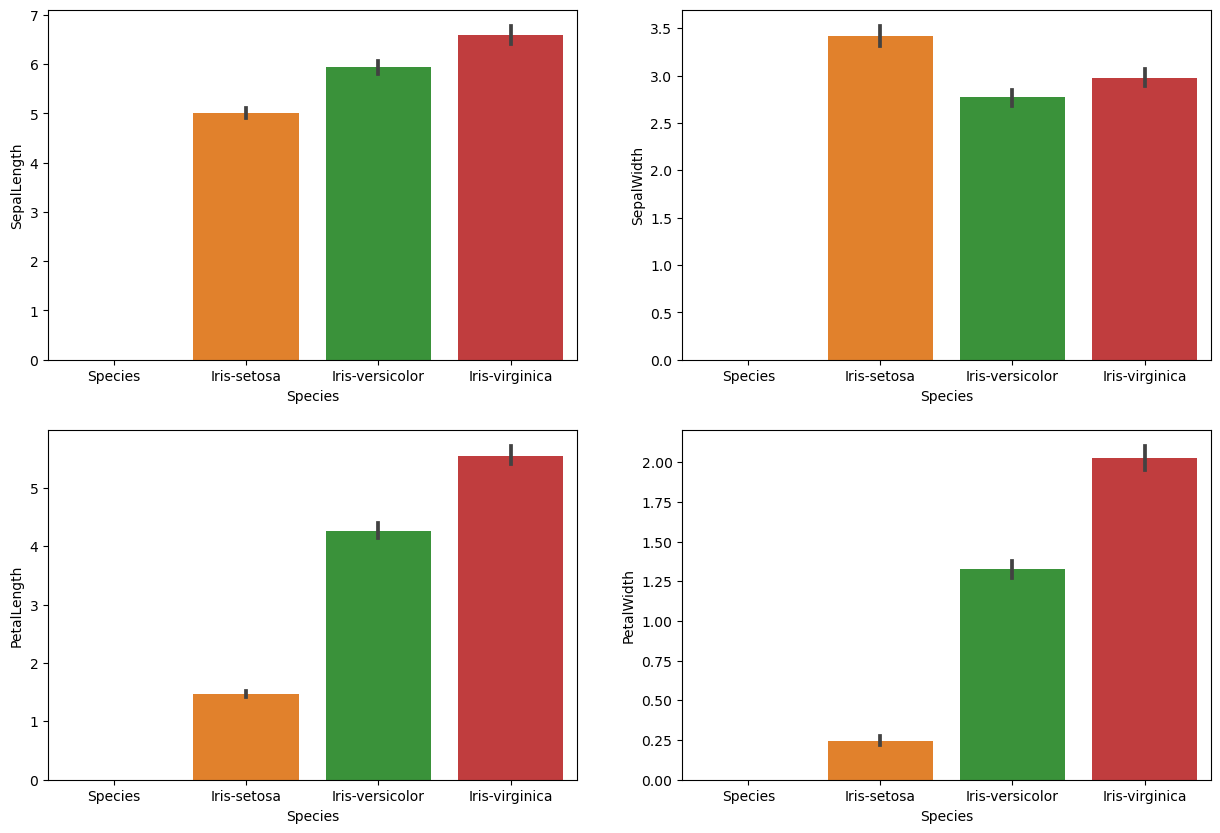

In [94]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = 'Species', y = 'SepalLength', data = df)
plt.subplot(2,2,2)
sns.barplot(x = 'Species', y = 'SepalWidth', data =df)
plt.subplot(2,2,3)
sns.barplot(x = 'Species', y = 'PetalLength', data = df)
plt.subplot(2,2,4)
sns.barplot(x = 'Species', y = 'PetalWidth', data = df)

In [95]:
X = df.drop(columns="Species")
y = df["Species"]

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [128]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

In [129]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [130]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(imputer.fit_transform(X_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 0 14  4]
 [ 0  0 14]]


0.9130434782608695